In [44]:
import pandas as pd 
import numpy as np

In [45]:
df = pd.read_csv('/content/spam.csv',encoding='Latin')

In [46]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [47]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [49]:
import matplotlib.pyplot as plt 
import seaborn as sns 


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [52]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'no of ham and spam')

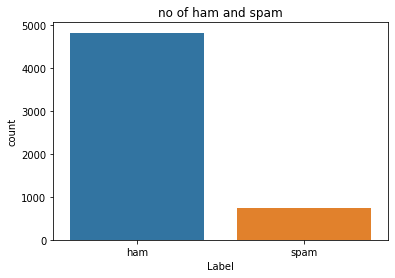

In [53]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('no of ham and spam')


In [54]:
X=df['v2']
y=df['v1']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [55]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [56]:
max_words = 1000
max_len = 150

In [57]:
import tensorflow as tf

In [58]:
print(tf.__version__)

2.8.2


In [59]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer

In [60]:
from tensorflow.keras.utils import to_categorical

In [61]:
from tensorflow.keras.layers import LSTM, Activation, Dense, Input, Embedding, Dropout
from tensorflow.keras.optimizers import RMSprop 
from tensorflow.keras.models import Model

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=1)

In [63]:
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [64]:
sequences_matrix

array([[  0,   0,   0, ...,  45, 660, 348],
       [  0,   0,   0, ..., 293,   4, 263],
       [  0,   0,   0, ...,   2,  11, 279],
       ...,
       [  0,   0,   0, ...,  27,  39,  17],
       [  0,   0,   0, ...,  42,  43,  60],
       [  0,   0,   0, ..., 227,  31,  10]], dtype=int32)

In [65]:
sequences

[[45, 660, 348],
 [131,
  1,
  523,
  3,
  15,
  172,
  123,
  72,
  11,
  124,
  61,
  18,
  5,
  548,
  1,
  59,
  293,
  4,
  263],
 [792, 158, 30, 13, 26, 113, 53, 7, 159, 451, 2, 11, 279],
 [6, 113],
 [452,
  178,
  1,
  182,
  3,
  114,
  1,
  286,
  3,
  204,
  104,
  2,
  236,
  31,
  10,
  11,
  386,
  8,
  23,
  1,
  45,
  21,
  2,
  236,
  2,
  838,
  15,
  3,
  11,
  66],
 [35, 387],
 [158, 185, 73, 237, 9, 4, 192],
 [67,
  398,
  8,
  33,
  10,
  30,
  97,
  145,
  470,
  839,
  63,
  11,
  603,
  81,
  11,
  44,
  15,
  139,
  15,
  314,
  432,
  412,
  746],
 [119,
  1,
  98,
  17,
  94,
  156,
  7,
  20,
  63,
  223,
  36,
  4,
  471,
  9,
  5,
  896,
  7,
  965,
  26,
  32,
  30,
  238],
 [377, 1, 160, 77, 197, 30, 3, 90, 10],
 [276,
  8,
  966,
  453,
  66,
  388,
  8,
  966,
  453,
  967,
  81,
  966,
  453,
  572,
  157,
  164,
  8,
  966,
  453,
  747,
  23,
  36,
  9,
  704,
  57,
  123,
  157,
  349,
  572],
 [549, 79, 3, 9, 4, 280],
 [3,
  17,
  186,
  4,
  254,

In [72]:
def lstm():
  inputs = Input(name='inputs',shape=[max_len])
  layer = Embedding(max_words,50,input_length=max_len)(inputs)
  layer = LSTM(64)(layer)
  layer = Dense(256,name='FC1')(layer)
  layer = Activation('relu')(layer)
  layer = Dropout(0.5)(layer)
  layer = Dense(1,name='out_layer')(layer)
  layer = Activation('sigmoid')(layer)
  model = Model(inputs=inputs,outputs=layer)
  return model

In [73]:
 model= lstm()

In [76]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 150, 50)           50000     
                                                                 
 lstm_3 (LSTM)               (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation_5 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

In [75]:

model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [78]:
# Early Dropping
from tensorflow.keras.callbacks import EarlyStopping

In [80]:
model.fit(sequences_matrix,y_train,batch_size=128,epochs=10,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
30/30 [==============================] - 11s 215ms/step - loss: 0.3294 - accuracy: 0.8696 - val_loss: 0.1257 - val_accuracy: 0.9810
Epoch 2/10
30/30 [==============================] - 6s 197ms/step - loss: 0.0855 - accuracy: 0.9794 - val_loss: 0.0458 - val_accuracy: 0.9873
